In [222]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib notebook

In [223]:
# https://docs.astropy.org/en/stable/cosmology/

In [224]:
from astropy.cosmology import Planck15 as cosmo
from astropy import constants as cons
from astropy import units as u
from astropy.cosmology import Planck15, z_at_value

In [225]:
print(cosmo.H(0))
print(cosmo.Om0)
print(cosmo.Ode0)

67.74 km / (Mpc s)
0.3075
0.6910098821161554


In [226]:
z = np.logspace(-4, 4, 100)
# Comoving Distance 
d_c = (cosmo.comoving_distance(z)).to(u.Mpc)

# Light-travel Distance (lookback time)
age=cosmo.age(z)
t_look = cosmo.lookback_time(z)
d_look = (cons.c * t_look.to(u.second)).to(u.Mpc)

# Angular distance
d_a = cosmo.angular_diameter_distance(z)

# Luminosity distance
d_L=cosmo.luminosity_distance(z)

<IPython.core.display.Javascript object>


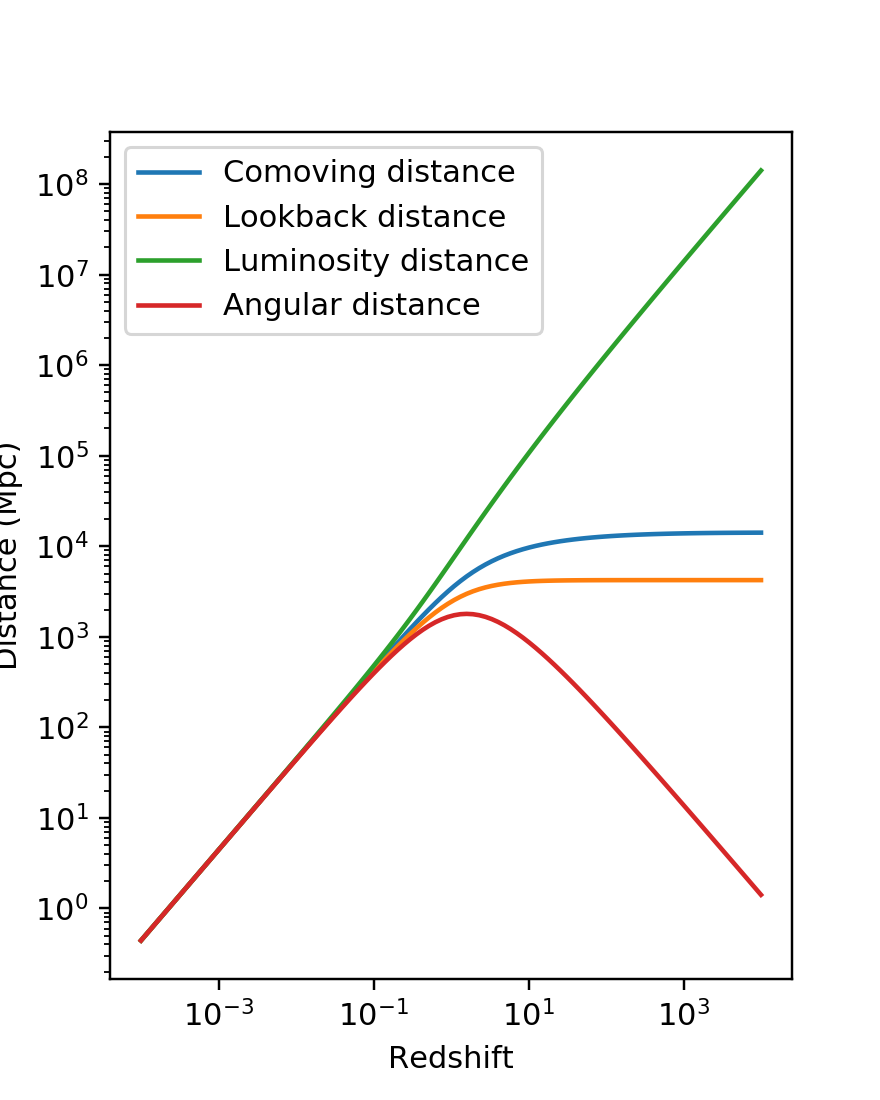

In [227]:
plt.figure(figsize=(4,5))
plt.loglog(z,d_c, label="Comoving distance")
plt.loglog(z,d_look, label="Lookback distance")
plt.loglog(z,d_L, label="Luminosity distance")
plt.loglog(z,d_a, label="Angular distance")

plt.ylabel("Distance (Mpc)")
plt.xlabel("Redshift")
plt.legend()

<IPython.core.display.Javascript object>


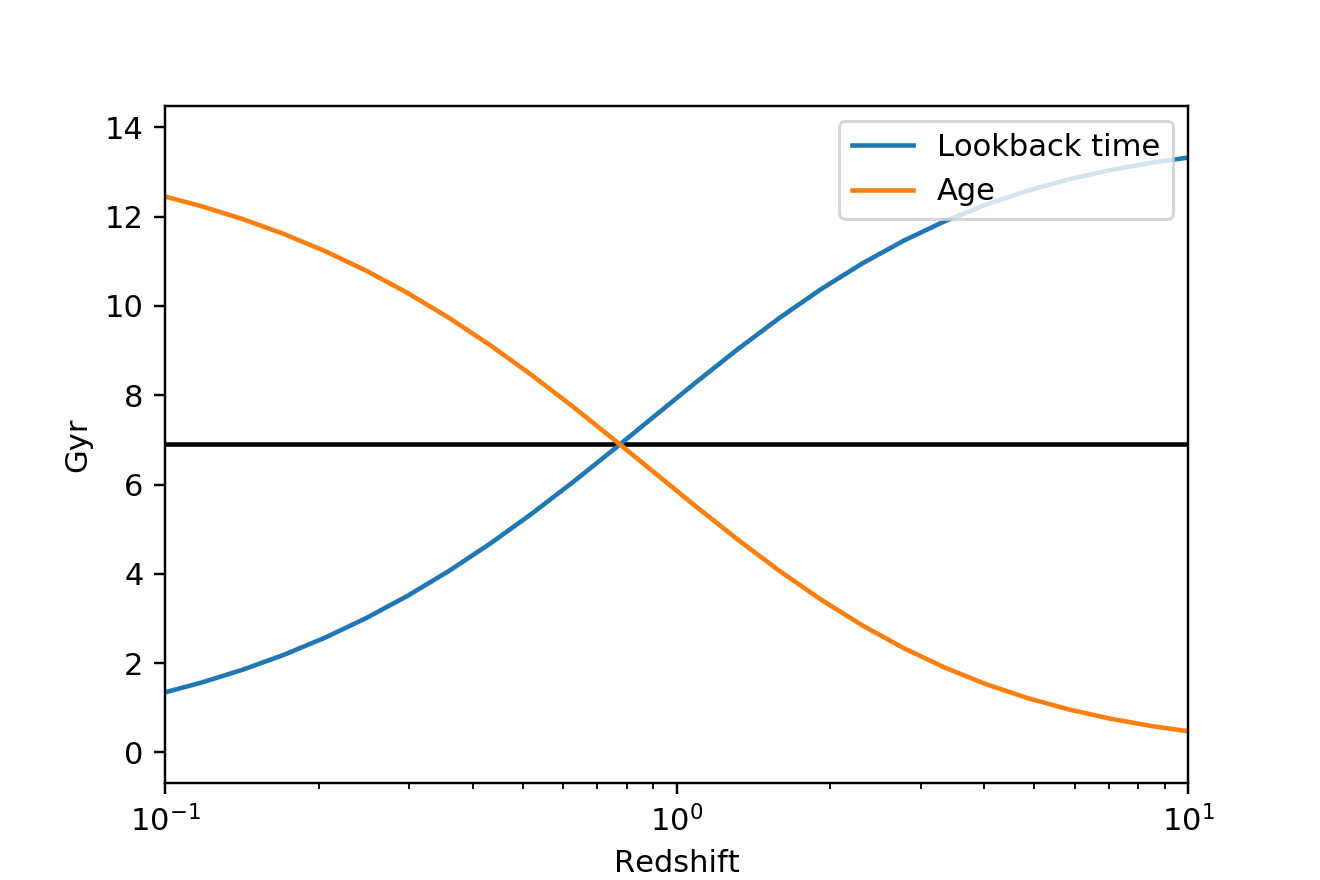

0.7753832365363222


In [228]:
plt.figure(figsize=(6,4))
plt.semilogx(z, t_look, label="Lookback time")
plt.semilogx(z, age, label="Age")
plt.hlines(age.data[0]/2, z[0], z[len(z)-1])
plt.ylabel("Gyr")
plt.xlabel("Redshift")
plt.legend(loc=1)
plt.xlim(1e-1,1e1)

print(z_at_value(cosmo.age, age[0]/2.))

<IPython.core.display.Javascript object>


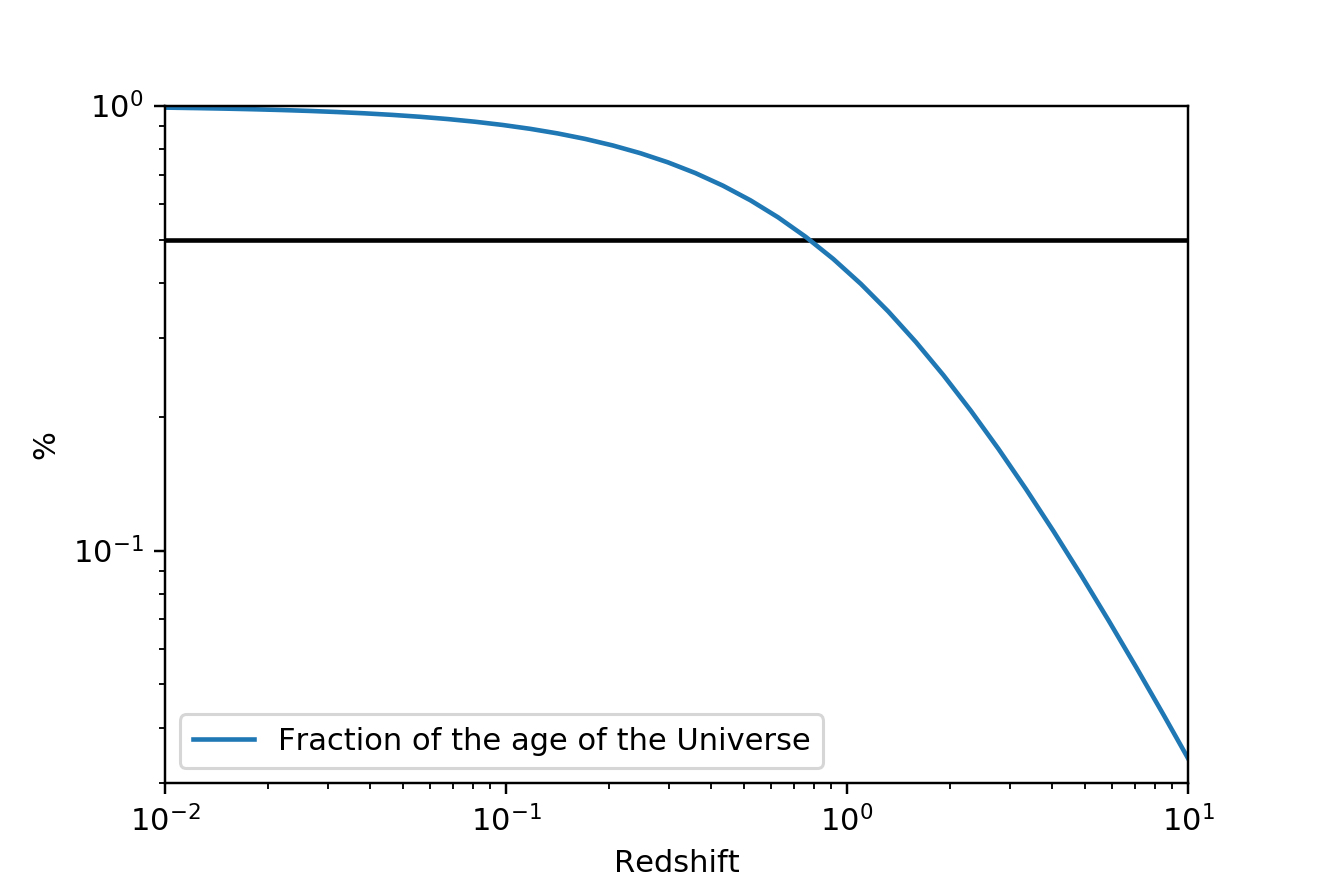

(0.03, 1)

In [203]:
plt.figure(figsize=(6,4))
plt.loglog(z, (age[0]-t_look)/age[0], label="Fraction of the age of the Universe")
plt.hlines(0.5, z[0], z[len(z)-1])
plt.ylabel("%")
plt.xlabel("Redshift")
plt.legend(loc=3)
plt.xlim(1e-2,10)
plt.ylim(0.03,1)


In [214]:
print(z_at_value(cosmo.age, 1.*u.Gyr))
print(z_at_value(cosmo.age, 2.*u.Gyr))

5.675848526916667
3.1976541518481736


<IPython.core.display.Javascript object>


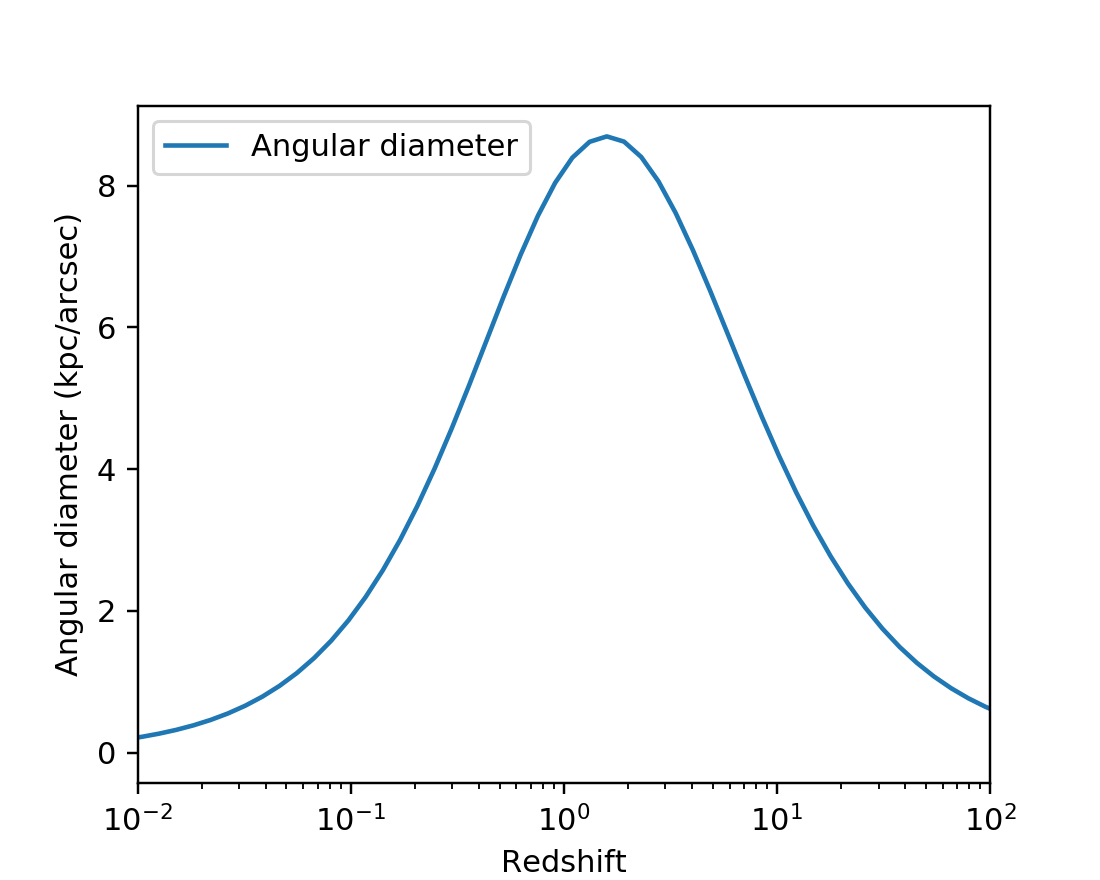

(0.01, 100.0)

In [252]:
plt.figure(figsize=(5,4))
plt.semilogx(z,d_a.to(u.kpc)*u.arcsec.to(u.rad), label="Angular diameter")
plt.ylabel("Angular diameter (kpc/arcsec)")
plt.xlabel("Redshift")
plt.legend()
plt.xlim(1e-2, 1e2)

<IPython.core.display.Javascript object>


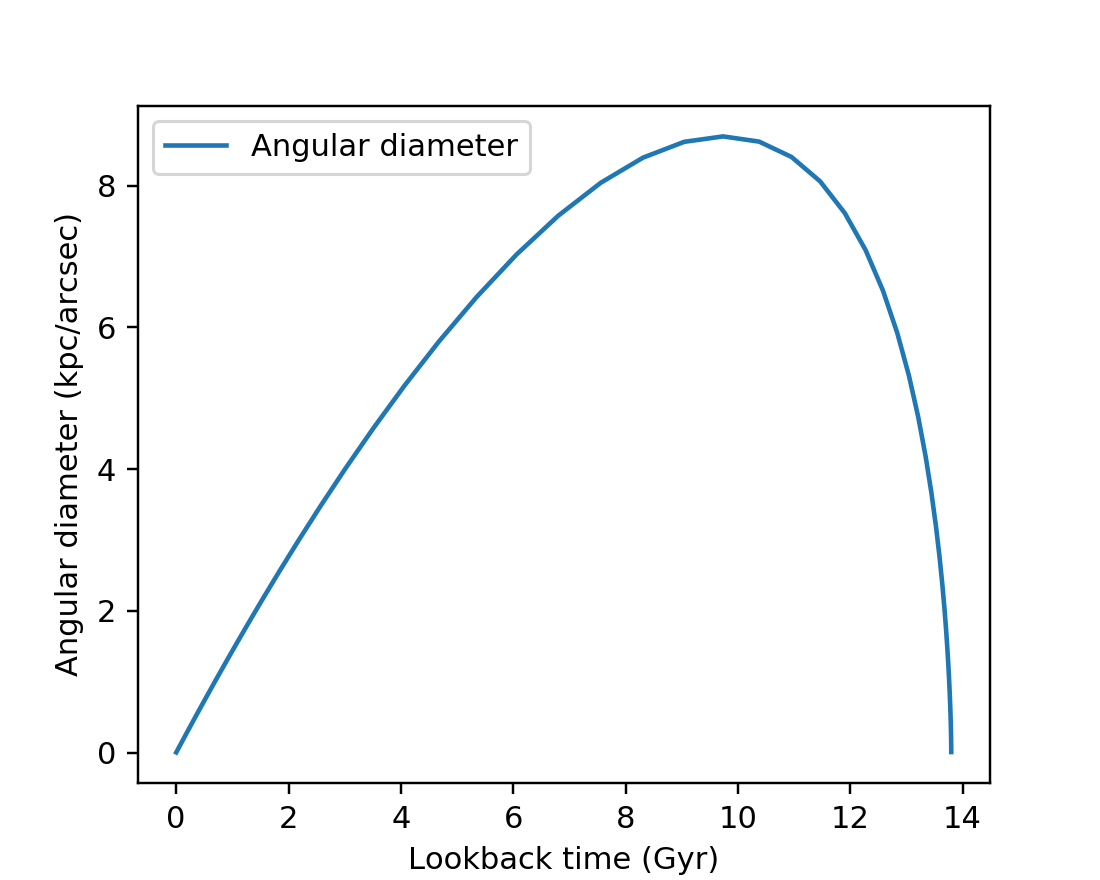

In [253]:
plt.figure(figsize=(5,4))
plt.plot(t_look,d_a.to(u.kpc)*u.arcsec.to(u.rad), label="Angular diameter")
plt.ylabel("Angular diameter (kpc/arcsec)")
plt.xlabel("Lookback time (Gyr)")
plt.legend()

<IPython.core.display.Javascript object>


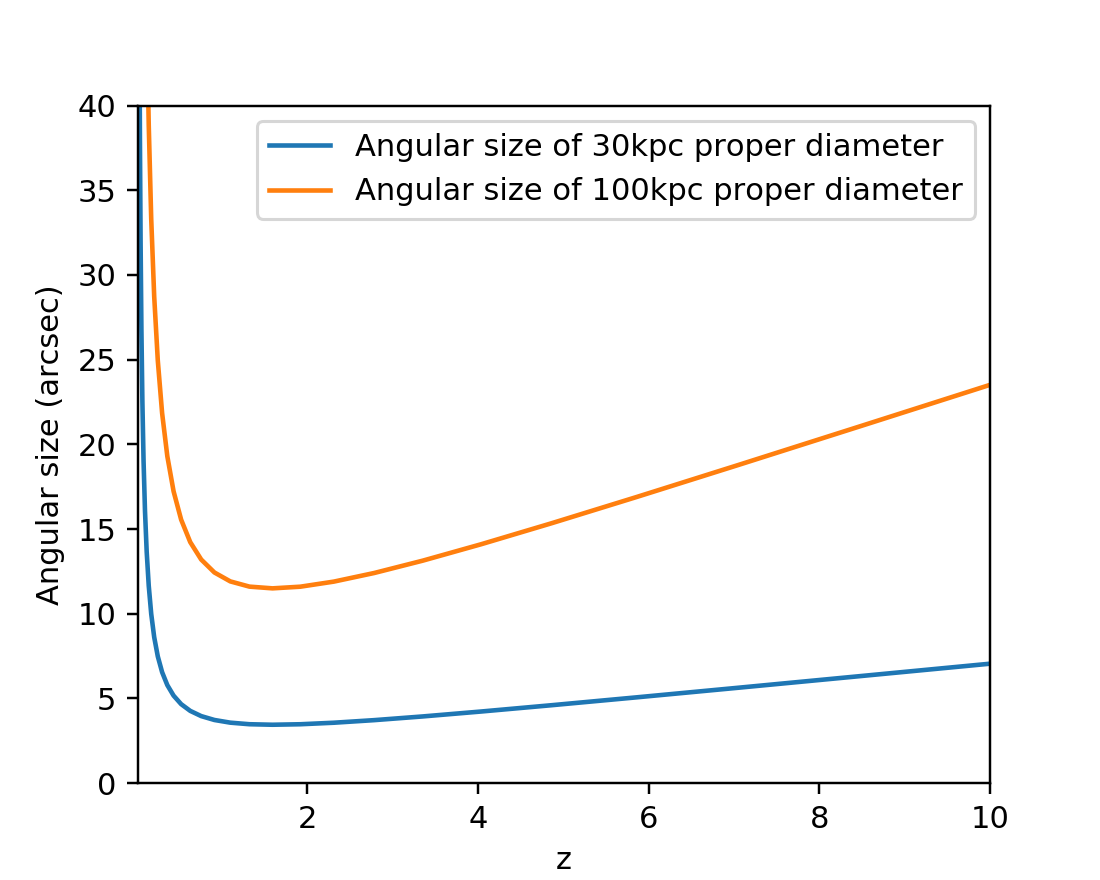

(0.01, 10)

In [337]:
plt.figure(figsize=(5,4))
size1 = 30.*u.kpc
plt.plot(z,(size1/d_a.to(u.kpc))/(1.*u.arcsec.to(u.rad)), label="Angular size of 30kpc proper diameter")
size1 = 100.*u.kpc
plt.plot(z,(size1/d_a.to(u.kpc))/(1.*u.arcsec.to(u.rad)), label="Angular size of 100kpc proper diameter")
plt.ylabel("Angular size (arcsec)")
plt.xlabel("z")
plt.legend(loc=1)
plt.ylim(0,40)
plt.xlim(1e-2, 10)

<IPython.core.display.Javascript object>


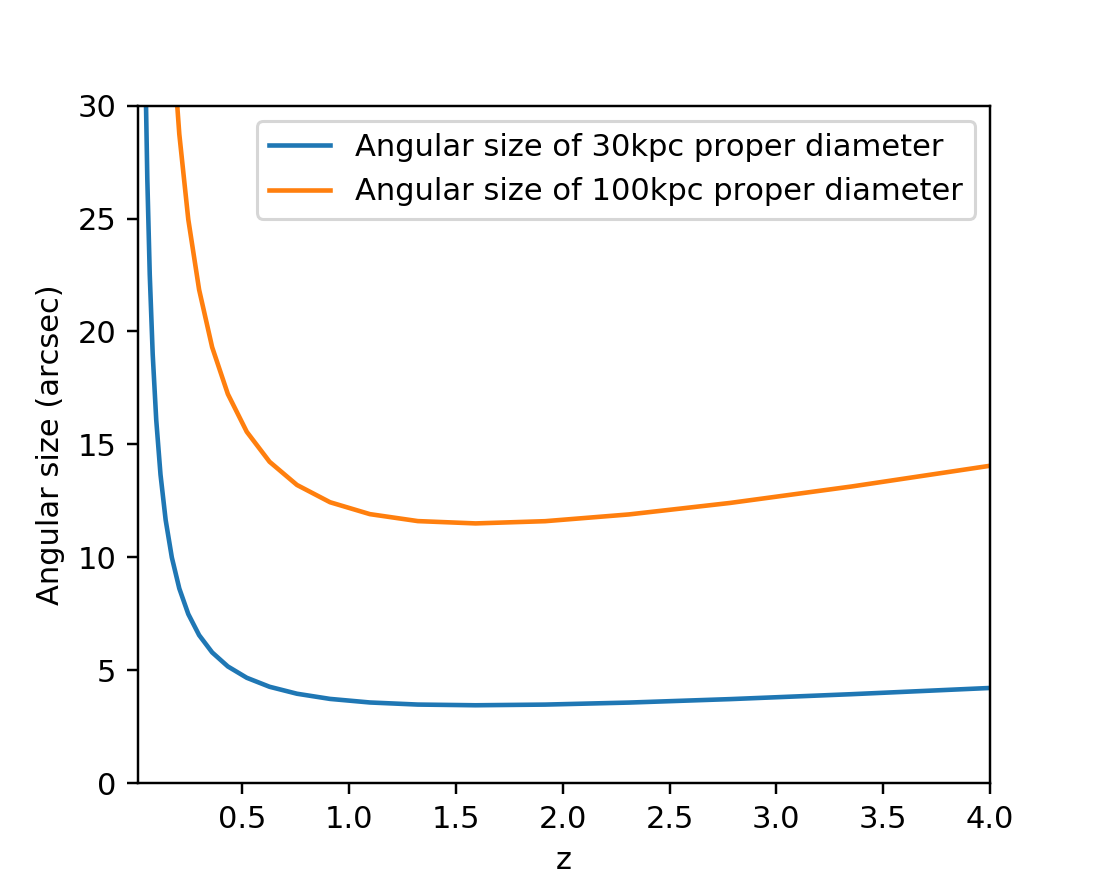

(0.01, 4)

In [338]:
plt.figure(figsize=(5,4))
size1 = 30.*u.kpc
plt.plot(z,(size1/d_a.to(u.kpc))/(1.*u.arcsec.to(u.rad)), label="Angular size of 30kpc proper diameter")
size1 = 100.*u.kpc
plt.plot(z,(size1/d_a.to(u.kpc))/(1.*u.arcsec.to(u.rad)), label="Angular size of 100kpc proper diameter")
plt.ylabel("Angular size (arcsec)")
plt.xlabel("z")
plt.legend(loc=1)
plt.ylim(0,30)
plt.xlim(1e-2, 4)

<IPython.core.display.Javascript object>


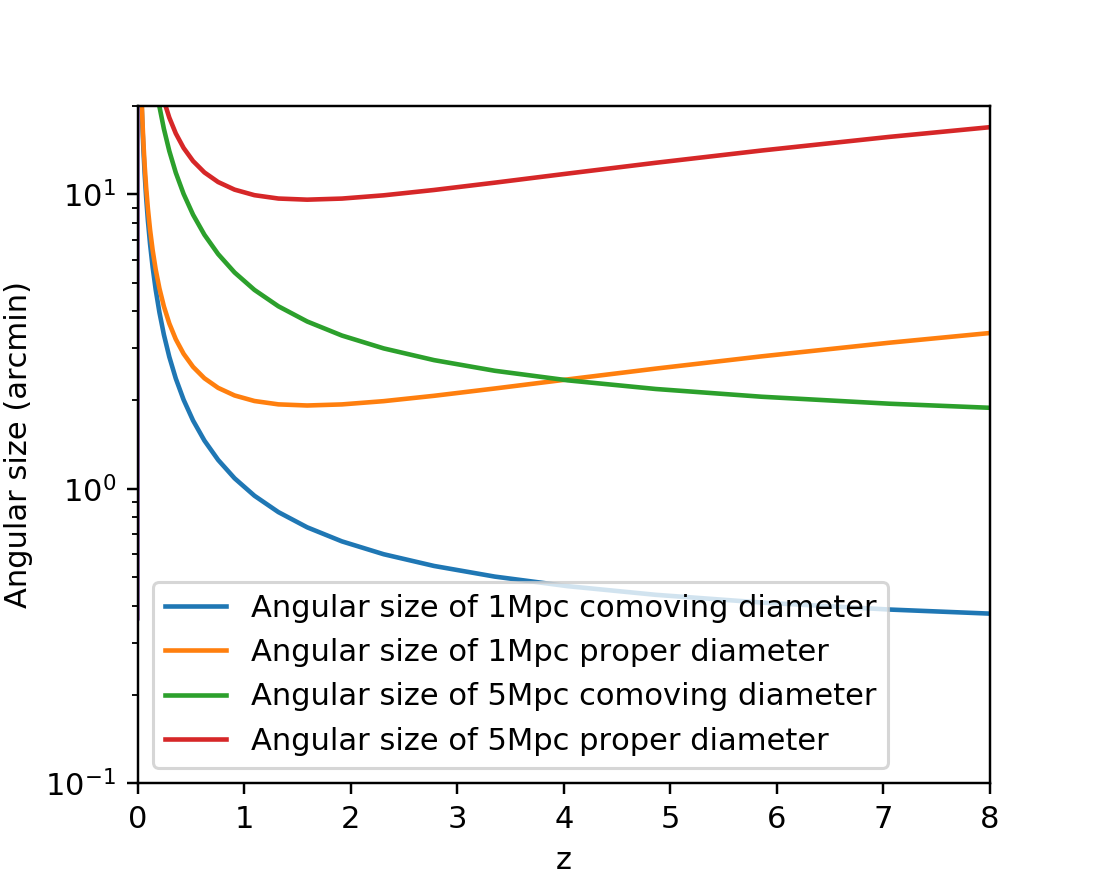

(0, 8)

In [343]:
plt.figure(figsize=(5,4))
size1 = 1000.*u.kpc
plt.semilogy(z,(size1/d_c.to(u.kpc))/(1.*u.arcmin.to(u.rad)), label="Angular size of 1Mpc comoving diameter")
plt.semilogy(z,(size1/d_a.to(u.kpc))/(1.*u.arcmin.to(u.rad)), label="Angular size of 1Mpc proper diameter")
size1 = 5000.*u.kpc
plt.semilogy(z,(size1/d_c.to(u.kpc))/(1.*u.arcmin.to(u.rad)), label="Angular size of 5Mpc comoving diameter")
plt.semilogy(z,(size1/d_a.to(u.kpc))/(1.*u.arcmin.to(u.rad)), label="Angular size of 5Mpc proper diameter")
plt.xlabel("z")
plt.ylabel("Angular size (arcmin)")
plt.legend(loc=3)
plt.ylim(0.1,20)
plt.xlim(0, 8)

In [341]:
# D_c = D_a * (1+z)

<IPython.core.display.Javascript object>


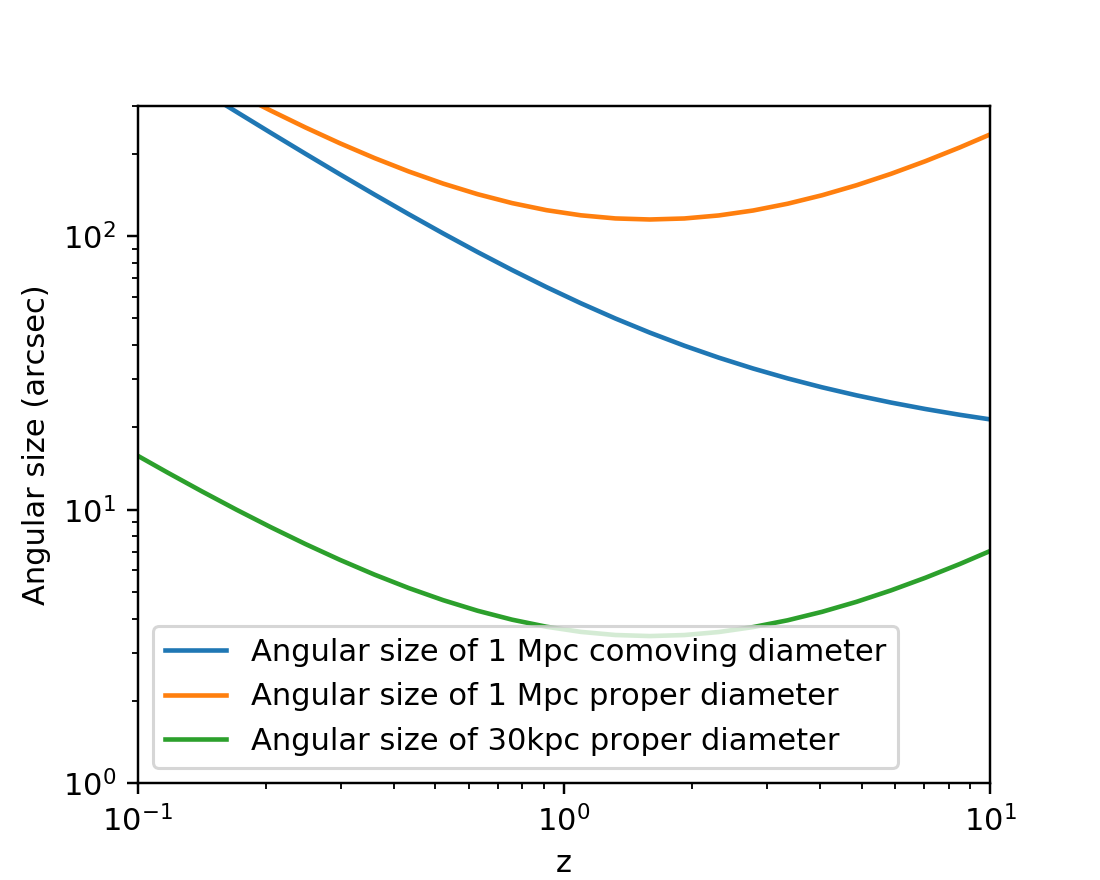

(0.1, 10)

In [342]:
plt.figure(figsize=(5,4))
size1 = 1000.*u.kpc
plt.semilogy(z,(size1/d_c.to(u.kpc))/(1.*u.arcsec.to(u.rad)), label="Angular size of 1 Mpc comoving diameter")
size1 = 1000.*u.kpc
plt.loglog(z,(size1/d_a.to(u.kpc))/(1.*u.arcsec.to(u.rad)), label="Angular size of 1 Mpc proper diameter")
size1 = 30.*u.kpc
plt.loglog(z,(size1/d_a.to(u.kpc))/(1.*u.arcsec.to(u.rad)), label="Angular size of 30kpc proper diameter")
plt.ylabel("Angular size (arcsec)")
plt.xlabel("z")
plt.legend(loc=3)
plt.ylim(1,300)
plt.xlim(1e-1, 10)

<IPython.core.display.Javascript object>


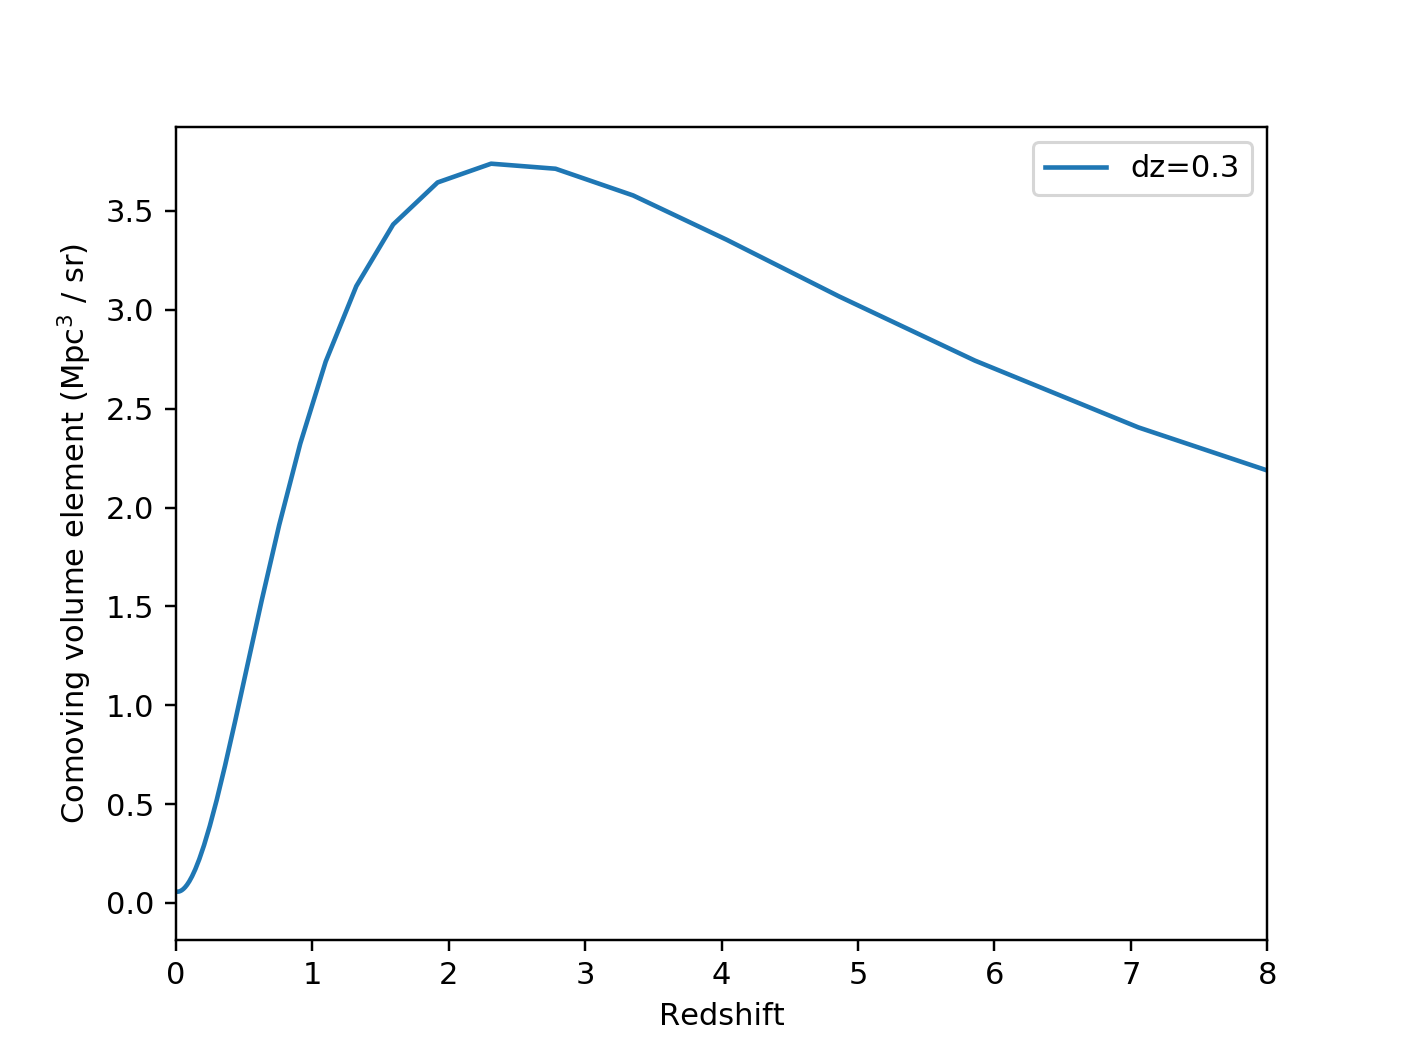

In [386]:
plt.figure()
plt.xlim(0,8)
dz=0.3
plt.plot(z,(cosmo.comoving_volume(z+dz/2)-cosmo.comoving_volume(z-dz/2))*(
(1.*u.arcsec.to(u.rad))**2), label='dz=0.3')
plt.xlabel("Redshift")
plt.ylabel("Comoving volume element (Mpc$^3$ / sr)")
plt.legend()
plt.show()